Utilizamos un diccionario (dataframes) para almacenar los DataFrames. Esto nos permite acceder fácilmente a cada DataFrame por su nombre de hoja, lo cual es muy organizado y práctico

Carga de Datos
Cargamos las distintas hojas del dataset en DataFrames de pandas. Esto nos permite explorar los datos de manera estructurada.

In [7]:
import pandas as pd

# Especificar el motor 'openpyxl' al leer el archivo Excel
hojas = ['Acc_vel_loc_sinrangos', 'Velocidad_sin_Rangos', 'Velocidad % por prov',
         'Totales VMD', 'Accesos_tecnologia_localidad', 'Totales Accesos Por Tecnología',
         'Accesos Por Tecnología', 'Dial-BAf', 'Totales Dial-BAf', 
         'Penetración-poblacion', 'Penetracion-hogares', 'Penetracion-totales',
         'Totales Accesos por velocidad', 'Accesos por velocidad', 'Ingresos']

# Diccionario para almacenar los DataFrames
dataframes = {hoja: pd.read_excel('Internet1.xlsx', sheet_name=hoja, engine='openpyxl') for hoja in hojas}


El error indica que no se encontró la hoja con el nombre 'Ingresos' en el archivo Excel. Verificamos que el nombre este bien escrito

In [8]:

# Leer el archivo Excel para obtener los nombres de las hojas
archivo_excel = pd.ExcelFile('Internet1.xlsx', engine='openpyxl')

# Mostrar los nombres de las hojas
print(archivo_excel.sheet_names)


['Acc_vel_loc_sinrangos', 'Velocidad_sin_Rangos', 'Accesos_tecnologia_localidad', 'Velocidad % por prov', 'Totales VMD', 'Totales Accesos Por Tecnología', 'Accesos Por Tecnología', 'Penetración-poblacion', 'Penetracion-hogares', 'Penetracion-totales', 'Totales Accesos por velocidad', 'Accesos por velocidad', 'Dial-BAf', 'Totales Dial-BAf', 'Ingresos']


Verificamos que la pestaña "ingresos " tiene un espacio vacio al final. Procedemos a corregirlo.

In [9]:
from openpyxl import load_workbook

# Cargar el archivo Excel
workbook = load_workbook('Internet1.xlsx')

# Cambiar el nombre de la hoja
workbook['Ingresos '].title = 'Ingresos'

# Guardar los cambios
workbook.save('Internet1.xlsx')

KeyError: 'Worksheet Ingresos  does not exist.'

In [ ]:
# Especificar el motor 'openpyxl' al leer el archivo Excel
hojas = ['Acc_vel_loc_sinrangos', 'Velocidad_sin_Rangos', 'Velocidad % por prov',
         'Totales VMD', 'Accesos_tecnologia_localidad', 'Totales Accesos Por Tecnología',
         'Accesos Por Tecnología', 'Dial-BAf', 'Totales Dial-BAf', 
         'Penetración-poblacion', 'Penetracion-hogares', 'Penetracion-totales',
         'Totales Accesos por velocidad', 'Accesos por velocidad', 'Ingresos']

# Creamos Diccionario para almacenar los DataFrames
dataframes = {hoja: pd.read_excel('Internet1.xlsx', sheet_name=hoja, engine='openpyxl') for hoja in hojas}


Descripción de las primeras filas: Es importante revisar las primeras filas de cada DataFrame para entender la estructura de los datos.

In [ ]:
for hoja, df in dataframes.items():
    print(f"\n--- Exploración inicial: {hoja} ---\n")
    print(df.head())
    print(df.info())
    print(df.describe(include='all'))


--- Exploración inicial: Acc_vel_loc_sinrangos ---

      Provincia     Partido          Localidad Link Indec  Otros  0,256 Mbps  \
0  BUENOS AIRES  25 de Mayo         25 de Mayo    6854100    NaN         NaN   
1  BUENOS AIRES  25 de Mayo    Agustín Mosconi    6854010    NaN         NaN   
2  BUENOS AIRES  25 de Mayo          Del Valle    6854020    NaN         NaN   
3  BUENOS AIRES  25 de Mayo          Ernestina    6854030    NaN         NaN   
4  BUENOS AIRES  25 de Mayo  Gobernador Ugarte    6854040    NaN         NaN   

   0,5 Mbps  0,512 Mbps  0,75 Mbps  1 Mbps  ...  680 Mbps  700 Mbps  800 Mbps  \
0       2.0         NaN       19.0     NaN  ...       NaN       NaN       NaN   
1       NaN         NaN        NaN     NaN  ...       NaN       NaN       NaN   
2       1.0         NaN        NaN     NaN  ...       NaN       NaN       NaN   
3       NaN         NaN        NaN     NaN  ...       NaN       NaN       NaN   
4       NaN         NaN        NaN     NaN  ...       NaN    

Verificamos valores faltantes en el dataset

In [ ]:
for hoja, df in dataframes.items():
    print(f"\n--- Valores faltantes en {hoja} ---\n")
    missing_values = df.isnull().sum()  
    total_missing = missing_values.sum()  
    
    print(missing_values)  
    print(f"\nTotal general de valores faltantes: {total_missing}\n")


--- Valores faltantes en Acc_vel_loc_sinrangos ---

Provincia        0
Partido          0
Localidad        0
Link Indec       0
Otros         2035
              ... 
999 Mbps      3048
1000 Mbps     2645
1024 Mbps     3063
4000 Mbps     3064
10000 Mbps    3063
Length: 125, dtype: int64

Total general de valores faltantes: 351902


--- Valores faltantes en Velocidad_sin_Rangos ---

Año           1
Trimestre     1
Provincia     1
Otros         1
0,256 Mbps    1
             ..
5125 Mbps     1
6000 Mbps     1
7000 Mbps     1
8000 Mbps     1
10000 Mbps    1
Length: 193, dtype: int64

Total general de valores faltantes: 192


--- Valores faltantes en Velocidad % por prov ---

Año                       0
Trimestre                 0
Provincia                 0
Mbps (Media de bajada)    0
dtype: int64

Total general de valores faltantes: 0


--- Valores faltantes en Totales VMD ---

Año                       0
Trimestre                 0
Mbps (Media de bajada)    0
Trimestre.1               0

Al revisar los valores faltantes, observamos que la columna Acc_vel_loc_sinrangos tiene un Total general de valores faltantes: 351902. Vamos a remplazar los valores nulos o faltantes con el numero 0 dado que son colummnas con datos numericos

In [ ]:
df_acc_vel_loc_sinrangos = pd.read_excel('Internet1.xlsx', sheet_name='Acc_vel_loc_sinrangos')

# Mostramos el total general de valores faltantes antes de la imputación
print(f"Total general de valores faltantes antes de la imputación: {df_acc_vel_loc_sinrangos.isnull().sum().sum()}")

# Reemplazamos los valores nulos en todas las columnas con 0
df_acc_vel_loc_sinrangos.fillna(0, inplace=True)

# Mostramos el total general de valores faltantes después de la imputación
print(f"Total general de valores faltantes después de la imputación: {df_acc_vel_loc_sinrangos.isnull().sum().sum()}")



Total general de valores faltantes antes de la imputación: 351902
Total general de valores faltantes después de la imputación: 0


In [ ]:
df_acc_vel_loc_sinrangos.dtypes

Provincia      object
Partido        object
Localidad      object
Link Indec     object
Otros         float64
               ...   
999 Mbps      float64
1000 Mbps     float64
1024 Mbps     float64
4000 Mbps     float64
10000 Mbps    float64
Length: 125, dtype: object

Pasamos las columnas numericas decimales a datos enteros

In [ ]:
#Convertimos todos los datos numéricos a enteros
for column in df_acc_vel_loc_sinrangos.columns:
    if pd.api.types.is_numeric_dtype(df_acc_vel_loc_sinrangos[column]):
        df_acc_vel_loc_sinrangos[column] = df_acc_vel_loc_sinrangos[column].astype(int)


In [ ]:
df_acc_vel_loc_sinrangos.dtypes

Provincia     object
Partido       object
Localidad     object
Link Indec    object
Otros          int32
               ...  
999 Mbps       int32
1000 Mbps      int32
1024 Mbps      int32
4000 Mbps      int32
10000 Mbps     int32
Length: 125, dtype: object

Vamos a explorar los accesos a internet por localidad y tipo de tecnología (ADSL, fibra óptica, etc.) y su distribución a nivel provincial y local. Este análisis permitirá determinar qué tecnologías son predominantes y en qué regiones, proporcionando una base sólida para decisiones estratégicas.

Comenzaremos importando las bibliotecas necesarias para el análisis.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Verificamos que las pestañas del dataset a utilizar no tengas valores duplicados, nulos o faltantes

In [ ]:
# Hojas que necesitamos a utilizar para el análisis
hojas_utilizadas = ['Acc_vel_loc_sinrangos', 'Accesos_tecnologia_localidad', 
                    'Totales Accesos Por Tecnología', 'Accesos Por Tecnología']

dataframes = pd.read_excel('Internet1.xlsx', sheet_name=hojas_utilizadas)

# Creamos la función para mostrar información básica de cada DataFrame
def info_basica(dataframes, hojas_utilizadas):
    for hoja in hojas_utilizadas:
        print(f"Información de {hoja}:")
        df = dataframes[hoja]
        print(df.info())
        print("\nValores faltantes por columna:")
        print(df.isnull().sum())
        print("\nPrimeras filas:")
        print(df.head())
        print("="*40)

info_basica(dataframes, hojas_utilizadas)

Información de Acc_vel_loc_sinrangos:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3065 entries, 0 to 3064
Columns: 125 entries, Provincia to 10000 Mbps
dtypes: float64(121), object(4)
memory usage: 2.9+ MB
None

Valores faltantes por columna:
Provincia        0
Partido          0
Localidad        0
Link Indec       0
Otros         2035
              ... 
999 Mbps      3048
1000 Mbps     2645
1024 Mbps     3063
4000 Mbps     3064
10000 Mbps    3063
Length: 125, dtype: int64

Primeras filas:
      Provincia     Partido          Localidad Link Indec  Otros  0,256 Mbps  \
0  BUENOS AIRES  25 de Mayo         25 de Mayo    6854100    NaN         NaN   
1  BUENOS AIRES  25 de Mayo    Agustín Mosconi    6854010    NaN         NaN   
2  BUENOS AIRES  25 de Mayo          Del Valle    6854020    NaN         NaN   
3  BUENOS AIRES  25 de Mayo          Ernestina    6854030    NaN         NaN   
4  BUENOS AIRES  25 de Mayo  Gobernador Ugarte    6854040    NaN         NaN   

   0,5 Mbps  0,512

Eliminaremos los duplicados de las pestañas 'Acc_vel_loc_sinrangos', 'Accesos_tecnologia_localidad','Totales Accesos Por Tecnología', 'Accesos Por Tecnología

In [ ]:
# Creamos la función para eliminar duplicados en los DataFrames seleccionados
def eliminar_duplicados(dataframes, hojas_utilizadas):
    for hoja in hojas_utilizadas:
        df = dataframes[hoja]
        duplicados = df.duplicated().sum()
        print(f"Duplicados en {hoja}: {duplicados}")
        if duplicados > 0:
            df.drop_duplicates(inplace=True)
            print(f"Duplicados eliminados en {hoja}.")
        print("="*40)

eliminar_duplicados(dataframes, hojas_utilizadas)


Duplicados en Acc_vel_loc_sinrangos: 0
Duplicados en Accesos_tecnologia_localidad: 279
Duplicados eliminados en Accesos_tecnologia_localidad.
Duplicados en Totales Accesos Por Tecnología: 0
Duplicados en Accesos Por Tecnología: 0


Vamos a identificar y visualizar outliers en los DataFrames seleccionados utilizando diagramas de caja (boxplots) para las variables cuantitativas.

C:\Users\Perettib\AppData\Local\Temp\ipykernel_3952\1947260594.py:30: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[i].set_xticklabels(axes[i].get_xticklabels(), rotation=45)
C:\Users\Perettib\AppData\Local\Temp\ipykernel_3952\1947260594.py:30: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[i].set_xticklabels(axes[i].get_xticklabels(), rotation=45)
C:\Users\Perettib\AppData\Local\Temp\ipykernel_3952\1947260594.py:30: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[i].set_xticklabels(axes[i].get_xticklabels(), rotation=45)


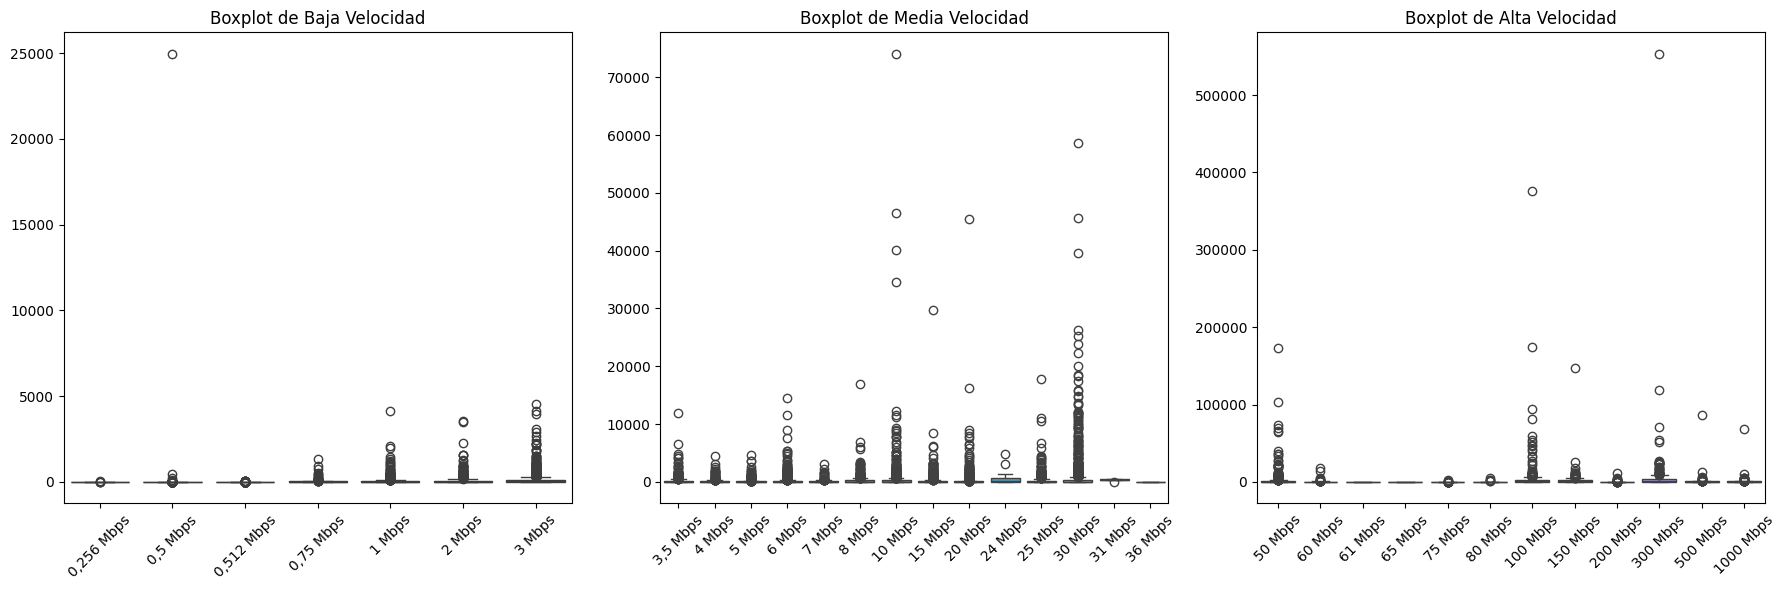

In [ ]:
# Creamos a la función para analizar y visualizar outliers agrupando por rangos de velocidades
def analizar_outliers_agrupados_horizontalmente(dataframes, hojas_utilizadas='Acc_vel_loc_sinrangos'):
    # Definimos los rangos de velocidades y sus columnas correspondientes
    rangos = {
        'Baja Velocidad': ['0,256 Mbps', '0,5 Mbps', '0,512 Mbps', '0,75 Mbps', '1 Mbps', '2 Mbps', '3 Mbps'],
        'Media Velocidad': ['3,5 Mbps', '4 Mbps', '5 Mbps', '6 Mbps', '7 Mbps', '8 Mbps', '10 Mbps', '15 Mbps', '20 Mbps', '24 Mbps', '25 Mbps', '30 Mbps', '31 Mbps', '36 Mbps'],
        'Alta Velocidad': ['50 Mbps', '60 Mbps', '61 Mbps', '65 Mbps', '75 Mbps', '80 Mbps', '100 Mbps', '150 Mbps', '200 Mbps', '300 Mbps', '500 Mbps', '1000 Mbps']
    }

    # Creamos una figura grande con subplots organizados en 1 fila x 3 columnas
    fig, axes = plt.subplots(1, 3, figsize=(18, 6))
    
    for i, (rango, columnas) in enumerate(rangos.items()):
        df_agrupado = pd.DataFrame()

        for hoja in hojas_utilizadas:
            df = dataframes[hoja]

            # Filtramos el dataframe para incluir solo las columnas del rango actual
            columnas_existentes = [col for col in columnas if col in df.columns]
            if not columnas_existentes:
                continue  

            df_filtrado = df[columnas_existentes]
            df_agrupado = pd.concat([df_agrupado, df_filtrado], axis=1)
        
        # Graficamos 
        sns.boxplot(data=df_agrupado, ax=axes[i])
        axes[i].set_title(f'Boxplot de {rango}')
        axes[i].set_xticklabels(axes[i].get_xticklabels(), rotation=45)
    
    plt.tight_layout()  
    plt.show()


analizar_outliers_agrupados_horizontalmente(dataframes, hojas_utilizadas)

Grafica: Las categorías muestra que las velocidades medias y altas tienen una mayor variabilidad y más outliers, lo que podría indicar una mayor inestabilidad en las condiciones que permiten o requieren velocidades altas.

Ya que resolvimos la visualizacion ya no es necesario ver el grafico en esta oportunidad. Vamos a identificar y visualizar outliers en los DataFrames seleccionados utilizando diagramas de caja (boxplots) para las variables cuantitativas.

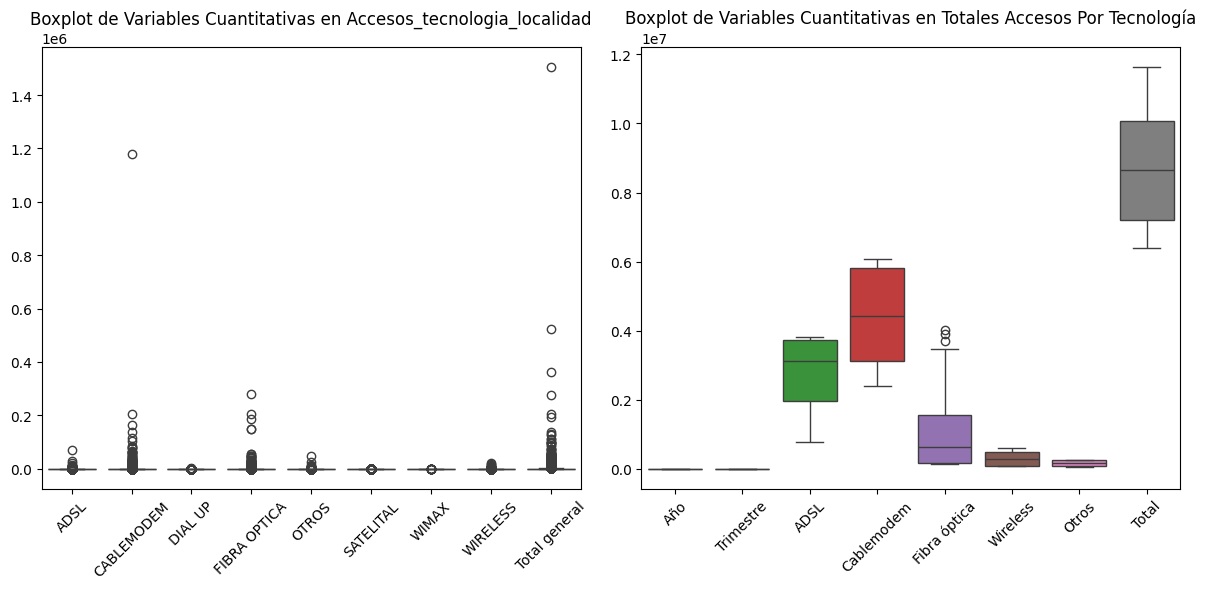

In [ ]:
import numpy as np

# Cargamos el archivo Excel
archivo_excel = 'Internet1.xlsx'

# Creamos un diccionario con los DataFrames para las hojas deseadas
hojas_deseadas = ['Accesos_tecnologia_localidad', 'Totales Accesos Por Tecnología']
dataframes = {hoja: pd.read_excel(archivo_excel, sheet_name=hoja) for hoja in hojas_deseadas}

# Llamamos función para analizar y visualizar outliers
def analizar_outliers(dataframes, hojas_utilizadas):
    num_hojas = len(hojas_utilizadas)
    cols = 3  
    filas = (num_hojas + cols - 1) // cols  
    
    plt.figure(figsize=(cols * 6, filas * 6))  
    
    for i, hoja in enumerate(hojas_utilizadas):
        df = dataframes[hoja]
        plt.subplot(filas, cols, i + 1)  
        sns.boxplot(data=df.select_dtypes(include=np.number))
        plt.title(f'Boxplot de Variables Cuantitativas en {hoja}')
        plt.xticks(rotation=45)
    
    plt.tight_layout()  
    plt.show()

# Llamamos a la función para analizar outliers usando solo las hojas deseadas
analizar_outliers(dataframes, hojas_deseadas)


Gráfica 1:

Fibra Óptica parece ser una tecnología predominante en ciertas localidades, cuenta con varios outliers que indican áreas con accesos significativamente altos.
ADSL y Cablemodem muestran una mayor variabilidad en el número de accesos, lo que sugiere que su distribución es más dispersa entre las localidades.
La presencia de outliers en varias tecnologías indica que hay localidades con características únicas que podrían ser interesantes para un análisis más detallado.

Gráfica 2

Los datos sugieren que **Cablemodem y ADSL** son las tecnologías más comunes, con **Cablemodem** mostrando la mayor variabilidad en número de accesos. **Fibra óptica** tiene una distribución más concentrada con algunos outliers que pueden indicar un crecimiento en áreas específicas.
La baja variabilidad de **Wireless** y Otros sugiere una adopción más controlada o limitada de estas tecnologías.
Las localidades con valores outliers en **Fibra óptica** podrían representar áreas de oportunidad o estudio para mejorar la infraestructura o entender mejor la adopción de tecnologías avanzadas.

Vamos a analizar cuantos individuos con una velocidad específica en una provincia, localidad y en un partido especifico. Utilizando las columnas de la pestaña "Acc_vel_loc_sinrangos"

In [ ]:
df_acc_vel_loc_sinrangos = pd.read_excel('Internet1.xlsx', sheet_name='Acc_vel_loc_sinrangos')
# Creamos la función para obtener el número de individuos con una velocidad específica en una provincia
def obtener_individuos_provincia(df, provincia, velocidad):
    if provincia in df['Provincia'].values and velocidad in df.columns:
        return int(df[df['Provincia'] == provincia][velocidad].sum())
    else:
        return f"Provincia '{provincia}' o velocidad '{velocidad}' no encontrada."

# Creamos la función para obtener el número de individuos con una velocidad específica en un partido
def obtener_individuos_partido(df, provincia, partido, velocidad):
    if provincia in df['Provincia'].values and partido in df['Partido'].values and velocidad in df.columns:
        return int(df[(df['Provincia'] == provincia) & (df['Partido'] == partido)][velocidad].sum())
    else:
        return f"Provincia '{provincia}', partido '{partido}' o velocidad '{velocidad}' no encontrada."

# Creamos la función para obtener el número de individuos con una velocidad específica en una localidad
def obtener_individuos_localidad(df, provincia, partido, localidad, velocidad):
    if (provincia in df['Provincia'].values and
        partido in df['Partido'].values and
        localidad in df['Localidad'].values and
        velocidad in df.columns):
        return int(df[(df['Provincia'] == provincia) &
                      (df['Partido'] == partido) &
                      (df['Localidad'] == localidad)][velocidad].sum())
    else:
        return f"Provincia '{provincia}', partido '{partido}', localidad '{localidad}' o velocidad '{velocidad}' no encontrada."



In [ ]:
# Definimos los parámetros
provincia = 'BUENOS AIRES'
partido = 'La Matanza'
localidad = 'San Justo'
velocidad = '15 Mbps'

# Obtenemos número de individuos
individuos_provincia = obtener_individuos_provincia(df_acc_vel_loc_sinrangos, provincia, velocidad)
individuos_partido = obtener_individuos_partido(df_acc_vel_loc_sinrangos, provincia, partido, velocidad)
individuos_localidad = obtener_individuos_localidad(df_acc_vel_loc_sinrangos, provincia, partido, localidad, velocidad)

# Imprimir resultados
print(f'Número de individuos con {velocidad} de velocidad en la provincia de {provincia} es de: {individuos_provincia}')
print(f'Número de individuos con {velocidad} de velocidad en el partido {partido} de la provincia de {provincia} es de: {individuos_partido}')
print(f'Número de individuos con {velocidad} de velocidad en la localidad de {localidad}, partido {partido}, provincia {provincia} es de: {individuos_localidad}')


Número de individuos con 15 Mbps de velocidad en la provincia de BUENOS AIRES es de: 94414
Número de individuos con 15 Mbps de velocidad en el partido La Matanza de la provincia de BUENOS AIRES es de: 2180
Número de individuos con 15 Mbps de velocidad en la localidad de San Justo, partido La Matanza, provincia BUENOS AIRES es de: 293


In [ ]:
# Definimos los parámetros para Jujuy
provincia = 'SAN LUIS'
partido = 'General Pedernera'  # Ejemplo de partido, cambia según tus datos
localidad = 'Justo Daract'  # Ejemplo de localidad, cambia según tus datos
velocidad = '15 Mbps'

# Obtenemos número de individuos
individuos_provincia = obtener_individuos_provincia(df_acc_vel_loc_sinrangos, provincia, velocidad)
individuos_partido = obtener_individuos_partido(df_acc_vel_loc_sinrangos, provincia, partido, velocidad)
individuos_localidad = obtener_individuos_localidad(df_acc_vel_loc_sinrangos, provincia, partido, localidad, velocidad)

# Imprimimos resultados
print(f'Número de individuos con {velocidad} de velocidad en la provincia de {provincia} es de: {individuos_provincia}')
print(f'Número de individuos con {velocidad} de velocidad en el partido {partido} de la provincia de {provincia} es de: {individuos_partido}')
print(f'Número de individuos con {velocidad} de velocidad en la localidad de {localidad}, partido {partido}, provincia {provincia} es de: {individuos_localidad}')


Número de individuos con 15 Mbps de velocidad en la provincia de SAN LUIS es de: 1836
Número de individuos con 15 Mbps de velocidad en el partido General Pedernera de la provincia de SAN LUIS es de: 822
Número de individuos con 15 Mbps de velocidad en la localidad de Justo Daract, partido General Pedernera, provincia SAN LUIS es de: 148


Vamos a ver la provincia con la mayor y menor penetración de internet en hogares, usando la pestaña "Penetración-hogares" pero antes vamos a ver si encontramos nulos o valores faltantes, valores redundantes duplicados.

In [ ]:
# Cargamos la hoja "Penetracion-hogares"
df_penetracion_hogares = pd.read_excel('Internet1.xlsx', sheet_name='Penetracion-hogares')

# Verificamos si hay datos duplicados
duplicados = df_penetracion_hogares[ df_penetracion_hogares.duplicated()]
print("Datos duplicados:")
print(duplicados)

Datos duplicados:
Empty DataFrame
Columns: [Año, Trimestre, Provincia, Accesos por cada 100 hogares]
Index: []


Vemos que no hay datos duplicados

Verificamos que no hay datos nulos o faltantes

In [ ]:
df_penetracion_hogares = pd.read_excel('Internet1.xlsx', sheet_name='Penetracion-hogares')
nulos = df.isnull().sum()
print("\nDatos nulos o faltantes por columna:")
print(nulos)


Datos nulos o faltantes por columna:
Año                          0
Trimestre                    0
Ingresos (miles de pesos)    0
Periodo                      0
dtype: int64


Procedemos ver la provincia con la mayor y menor penetración de internet en hogares

In [ ]:
df_penetracion_hogares = pd.read_excel('Internet1.xlsx', sheet_name='Penetracion-hogares')

# Definimos los nombres de las columnas
columna_provincia = 'Provincia'
columna_penetracion = 'Accesos por cada 100 hogares'

# Identificando la provincia con la mayor penetración de internet en hogares
provincia_max_penetracion =  df_penetracion_hogares.loc[df_penetracion_hogares[columna_penetracion].idxmax(), columna_provincia]
max_penetracion =  df_penetracion_hogares[columna_penetracion].max()

# EIdentificando la provincia con la menor penetración de internet en hogares
provincia_min_penetracion =  df_penetracion_hogares.loc[df_penetracion_hogares[columna_penetracion].idxmin(), columna_provincia]
min_penetracion = df_penetracion_hogares[columna_penetracion].min()

# Imprimir resultados
print(f'La provincia con la mayor penetración de internet en hogares es {provincia_max_penetracion} con una penetración de {max_penetracion:.2f} accesos por cada 100 hogares.')
print(f'La provincia con la menor penetración de internet en hogares es {provincia_min_penetracion} con una penetración de {min_penetracion:.2f} accesos por cada 100 hogares.')


La provincia con la mayor penetración de internet en hogares es Capital Federal con una penetración de 124.06 accesos por cada 100 hogares.
La provincia con la menor penetración de internet en hogares es San Luis con una penetración de 9.35 accesos por cada 100 hogares.


 Vemos que en Capítal Federal, hay más conexiones a internet que hogares, lo cual puede indicar que en algunos hogares hay más de una conexión a internet, o que hay conexiones compartidas entre hogares y en San Luis, no llega al 10%.

Vamos a explorar e identificar la tecnología de conexión más prevalente en cada provincia y visualizar los accesos por tipo de tecnología 

Vamos a utilizar una nueva pestaña llamada  'Accesos_tecnologia_localidad', lo cual antes de explorar vamos a verificar si cuenta con valores faltantes, valores atípicos/extremos u outliers y registros duplicados.

In [ ]:
# Cargamos la hoja "Accesos_tecnologia_localidad"
df_tecnologia = pd.read_excel('Internet1.xlsx', sheet_name='Accesos_tecnologia_localidad')

# Verificamos si hay valores faltantes
faltantes = df_tecnologia.isnull().sum()
print("Valores faltantes por columna:")
print(faltantes)
print("="*40)

Valores faltantes por columna:
Provincia        280
Partido          280
Localidad        280
Link Indec       280
ADSL               0
CABLEMODEM         0
DIAL UP            0
FIBRA OPTICA       0
OTROS              0
SATELITAL          0
WIMAX              0
WIRELESS           0
Total general      0
dtype: int64


Analizando que los valores son de dato str vamos a rellenarn esos valores nulos con "sin dato" 

In [ ]:
df_tecnologia = pd.read_excel('Internet1.xlsx', sheet_name='Accesos_tecnologia_localidad')


columnas_verificar = ['Provincia', 'Partido', 'Localidad', 'Link Indec']

# Reemplazamos valores nulos por 'Sin dato'
df_tecnologia[columnas_verificar] = df_tecnologia[columnas_verificar].fillna('Sin dato')

# Verificamos valores faltantes
faltantes_despues = df_tecnologia.isnull().sum()
print("Valores faltantes por columna después de reemplazar:")
print(faltantes_despues)


for col in columnas_verificar:
    print(f"Número de 'Sin dato' en la columna '{col}': {df_tecnologia[col].value_counts().get('Sin dato', 0)}")

# Guardamos el DataFrame modificado (opcional)
df_tecnologia.to_excel('Accesos_tecnologia_localidad_modificado.xlsx', index=False)

with pd.ExcelWriter('Internet1.xlsx', engine='openpyxl', mode='a', if_sheet_exists='replace') as writer:
    df_tecnologia.to_excel(writer, sheet_name='Accesos_tecnologia_localidad', index=False)


Valores faltantes por columna después de reemplazar:
Provincia        0
Partido          0
Localidad        0
Link Indec       0
ADSL             0
CABLEMODEM       0
DIAL UP          0
FIBRA OPTICA     0
OTROS            0
SATELITAL        0
WIMAX            0
WIRELESS         0
Total general    0
dtype: int64
Número de 'Sin dato' en la columna 'Provincia': 280
Número de 'Sin dato' en la columna 'Partido': 280
Número de 'Sin dato' en la columna 'Localidad': 280
Número de 'Sin dato' en la columna 'Link Indec': 280


In [ ]:
print(df_tecnologia.dtypes)

Provincia        object
Partido          object
Localidad        object
Link Indec       object
ADSL              int64
CABLEMODEM        int64
DIAL UP           int64
FIBRA OPTICA      int64
OTROS             int64
SATELITAL         int64
WIMAX             int64
WIRELESS          int64
Total general     int64
dtype: object


In [ ]:
# Cargamos la hoja "Accesos_tecnologia_localidad"
df_tecnologia = pd.read_excel('Internet1.xlsx', sheet_name='Accesos_tecnologia_localidad')

# Verificamos si hay valores faltantes
faltantes = df_tecnologia.isnull().sum()
print("Valores faltantes por columna:")
print(faltantes)
print("="*40)

Valores faltantes por columna:
Provincia        0
Partido          0
Localidad        0
Link Indec       0
ADSL             0
CABLEMODEM       0
DIAL UP          0
FIBRA OPTICA     0
OTROS            0
SATELITAL        0
WIMAX            0
WIRELESS         0
Total general    0
dtype: int64


In [ ]:
# Verificamos si hay registros duplicados
duplicados = df_tecnologia[df_tecnologia.duplicated()]
print("Registros duplicados:")
print(duplicados)

Registros duplicados:
     Provincia   Partido Localidad Link Indec  ADSL  CABLEMODEM  DIAL UP  \
3073  Sin dato  Sin dato  Sin dato   Sin dato     0           0        0   
3074  Sin dato  Sin dato  Sin dato   Sin dato     0           0        0   
3075  Sin dato  Sin dato  Sin dato   Sin dato     0           0        0   
3076  Sin dato  Sin dato  Sin dato   Sin dato     0           0        0   
3077  Sin dato  Sin dato  Sin dato   Sin dato     0           0        0   
...        ...       ...       ...        ...   ...         ...      ...   
3347  Sin dato  Sin dato  Sin dato   Sin dato     0           0        0   
3348  Sin dato  Sin dato  Sin dato   Sin dato     0           0        0   
3349  Sin dato  Sin dato  Sin dato   Sin dato     0           0        0   
3350  Sin dato  Sin dato  Sin dato   Sin dato     0           0        0   
3351  Sin dato  Sin dato  Sin dato   Sin dato     0           0        0   

      FIBRA OPTICA  OTROS  SATELITAL  WIMAX  WIRELESS  Total gene

Valores atipicos extremos

In [ ]:

print("\nEstadísticas descriptivas:")
print(df_tecnologia.describe())

# Verificamos valores atípicos por columna (análisis básico)
outliers = {}
for col in df_tecnologia.select_dtypes(include=['float64', 'int64']).columns:
    # Calculamos el rango intercuartílico (IQR)
    Q1 = df_tecnologia[col].quantile(0.25)
    Q3 = df_tecnologia[col].quantile(0.75)
    IQR = Q3 - Q1
    
    # Determinamos los límites para valores atípicos
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    # Vamos a identificar los valores atípicos
    outliers[col] = df_tecnologia[(df_tecnologia[col] < lower_bound) | (df_tecnologia[col] > upper_bound)]

print("\nValores atípicos/extremos detectados:")
for col, outliers_df in outliers.items():
    print(f"\nColumna: {col}")
    print(outliers_df)


Estadísticas descriptivas:
               ADSL    CABLEMODEM      DIAL UP   FIBRA OPTICA         OTROS  \
count   3352.000000  3.352000e+03  3352.000000    3352.000000   3352.000000   
mean     231.048628  1.786085e+03     3.518198    1197.822494     71.906325   
std     1550.293816  2.181544e+04    41.351933    8522.597506   1012.885167   
min        0.000000  0.000000e+00     0.000000       0.000000      0.000000   
25%        0.000000  0.000000e+00     0.000000       0.000000      0.000000   
50%        0.000000  0.000000e+00     0.000000       0.000000      0.000000   
75%       37.000000  0.000000e+00     0.000000     110.000000      0.000000   
max    70108.000000  1.177475e+06  2050.000000  281390.000000  46762.000000   

         SATELITAL        WIMAX      WIRELESS  Total general  
count  3352.000000  3352.000000   3352.000000   3.352000e+03  
mean      0.874105     0.652745    178.604415   3.470512e+03  
std      13.032554    14.459441    721.026209   3.040984e+04  
min     

Vamos a normalizar los datos con sklearn.preprocessing, usando MinMaxScaler, que escala los datos para que estén en un rango específico, típicamente entre 0 y 1

In [ ]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

# Cargamos los datos
df_tecnologia = pd.read_excel('Internet1.xlsx', sheet_name='Accesos_tecnologia_localidad')

# Definimos las columnas a normalizar
columnas = ['ADSL', 'CABLEMODEM', 'FIBRA OPTICA']

# Verificamos si las columnas existen en el DataFrame
if all(columna in df_tecnologia.columns for columna in columnas):
    # Crear el escalador
    scaler = MinMaxScaler()

    # Guardamos valores originales y aplicar el escalador
    for columna in columnas:
        # Obtenemos los valores originales
        valores_originales = df_tecnologia[[columna]].copy()

        # Aplicamos el escalador a la columna
        df_tecnologia[columna] = scaler.fit_transform(df_tecnologia[[columna]])

        # Imprimimos los valores originales y normalizados
        print(f"Valores originales para {columna}:")
        print(valores_originales.describe())
        
        print(f"\nDatos normalizados para {columna}:")
        print(df_tecnologia[[columna]].describe())

        # Verificamos el rango de los datos normalizados
        min_valor_normalizado = df_tecnologia[columna].min()
        max_valor_normalizado = df_tecnologia[columna].max()

        print(f"\nRango de datos normalizados para {columna}: {min_valor_normalizado} - {max_valor_normalizado}\n")
else:
    print("Una o más columnas no se encuentran en el DataFrame.")


Valores originales para ADSL:
               ADSL
count   3352.000000
mean     231.048628
std     1550.293816
min        0.000000
25%        0.000000
50%        0.000000
75%       37.000000
max    70108.000000

Datos normalizados para ADSL:
              ADSL
count  3352.000000
mean      0.003296
std       0.022113
min       0.000000
25%       0.000000
50%       0.000000
75%       0.000528
max       1.000000

Rango de datos normalizados para ADSL: 0.0 - 1.0

Valores originales para CABLEMODEM:
         CABLEMODEM
count  3.352000e+03
mean   1.786085e+03
std    2.181544e+04
min    0.000000e+00
25%    0.000000e+00
50%    0.000000e+00
75%    0.000000e+00
max    1.177475e+06

Datos normalizados para CABLEMODEM:
        CABLEMODEM
count  3352.000000
mean      0.001517
std       0.018527
min       0.000000
25%       0.000000
50%       0.000000
75%       0.000000
max       1.000000

Rango de datos normalizados para CABLEMODEM: 0.0 - 1.0

Valores originales para FIBRA OPTICA:
        FIBRA OPTI

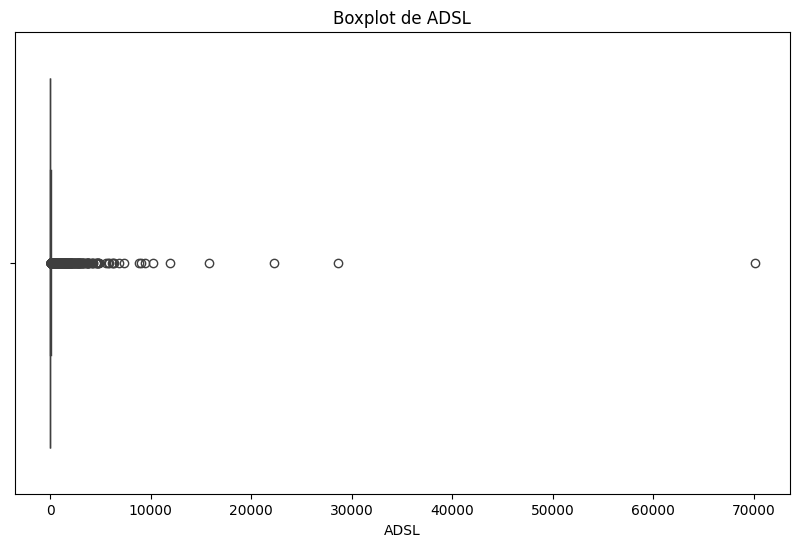

In [ ]:
# Cargamos los datos
df_tecnologia = pd.read_excel('Internet1.xlsx', sheet_name='Accesos_tecnologia_localidad')


columna = 'ADSL'

plt.figure(figsize=(10, 6))
sns.boxplot(x=df_tecnologia[columna])
plt.title('Boxplot de ADSL')
plt.xlabel('ADSL')
plt.show()


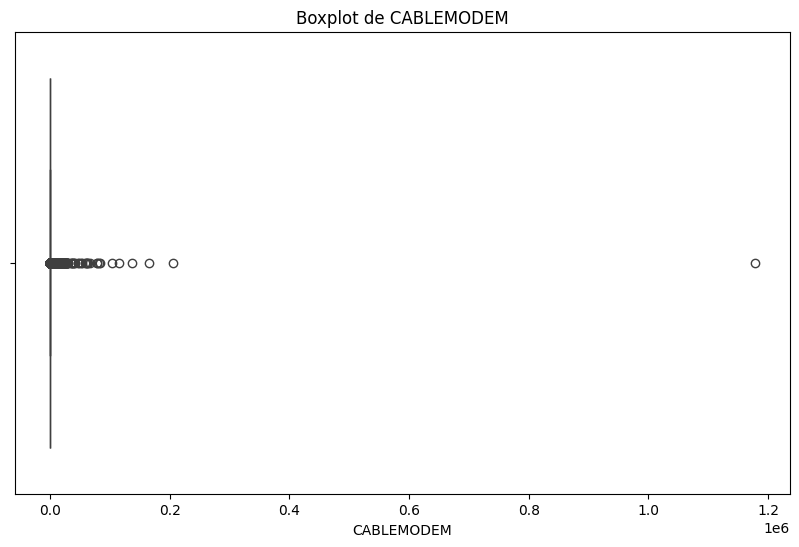

In [ ]:
# Cargamos los datos necesarios
df_tecnologia = pd.read_excel('Internet1.xlsx', sheet_name='Accesos_tecnologia_localidad')


columna = 'CABLEMODEM'

# Verificamos si la columna existe en el DataFrame
if columna in df_tecnologia.columns:
    plt.figure(figsize=(10, 6))
    sns.boxplot(x=df_tecnologia[columna])
    plt.title('Boxplot de CABLEMODEM')
    plt.xlabel('CABLEMODEM')
    plt.show()
else:
    print(f"La columna '{columna}' no se encuentra en el DataFrame.")

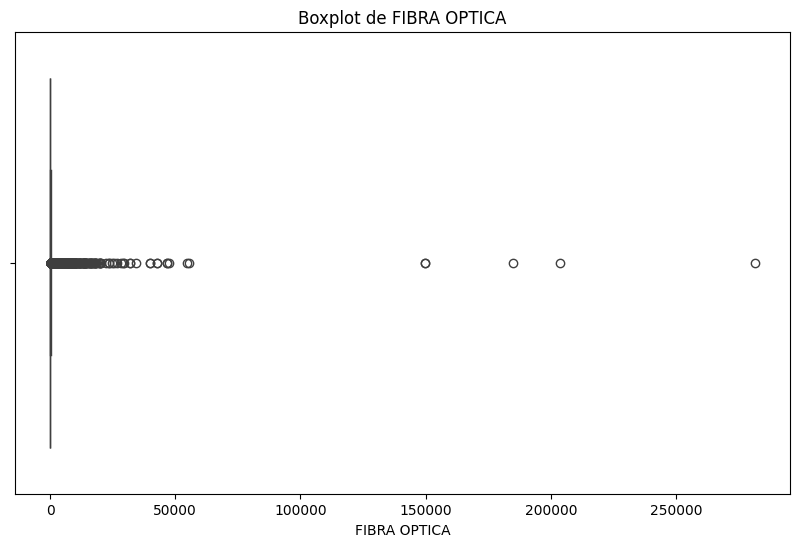

In [ ]:
df_tecnologia = pd.read_excel('Internet1.xlsx', sheet_name='Accesos_tecnologia_localidad')

columna = 'FIBRA OPTICA'

if columna in df_tecnologia.columns:
    plt.figure(figsize=(10, 6))
    sns.boxplot(x=df_tecnologia[columna])
    plt.title('Boxplot de FIBRA OPTICA')
    plt.xlabel('FIBRA OPTICA')
    plt.show()
else:
    print(f"La columna '{columna}' no se encuentra en el DataFrame.")

Vamos a explorar las tecnología más prevalente en cada provincia

Tecnología más prevalente por provincia:
              Provincia Tecnologia_Prevalente
0          BUENOS AIRES            CABLEMODEM
1                  CABA            CABLEMODEM
2             CATAMARCA          FIBRA OPTICA
3                 CHACO          FIBRA OPTICA
4                CHUBUT            CABLEMODEM
5               CORDOBA          FIBRA OPTICA
6            CORRIENTES            CABLEMODEM
7            ENTRE RIOS            CABLEMODEM
8               FORMOSA            CABLEMODEM
9                 JUJUY            CABLEMODEM
10             LA PAMPA            CABLEMODEM
11             LA RIOJA            CABLEMODEM
12              MENDOZA          FIBRA OPTICA
13             MISIONES          FIBRA OPTICA
14              NEUQUEN            CABLEMODEM
15            RIO NEGRO          FIBRA OPTICA
16                SALTA            CABLEMODEM
17             SAN JUAN          FIBRA OPTICA
18           SANTA CRUZ          FIBRA OPTICA
19             SANTA FE            CABL

<Figure size 1400x800 with 0 Axes>

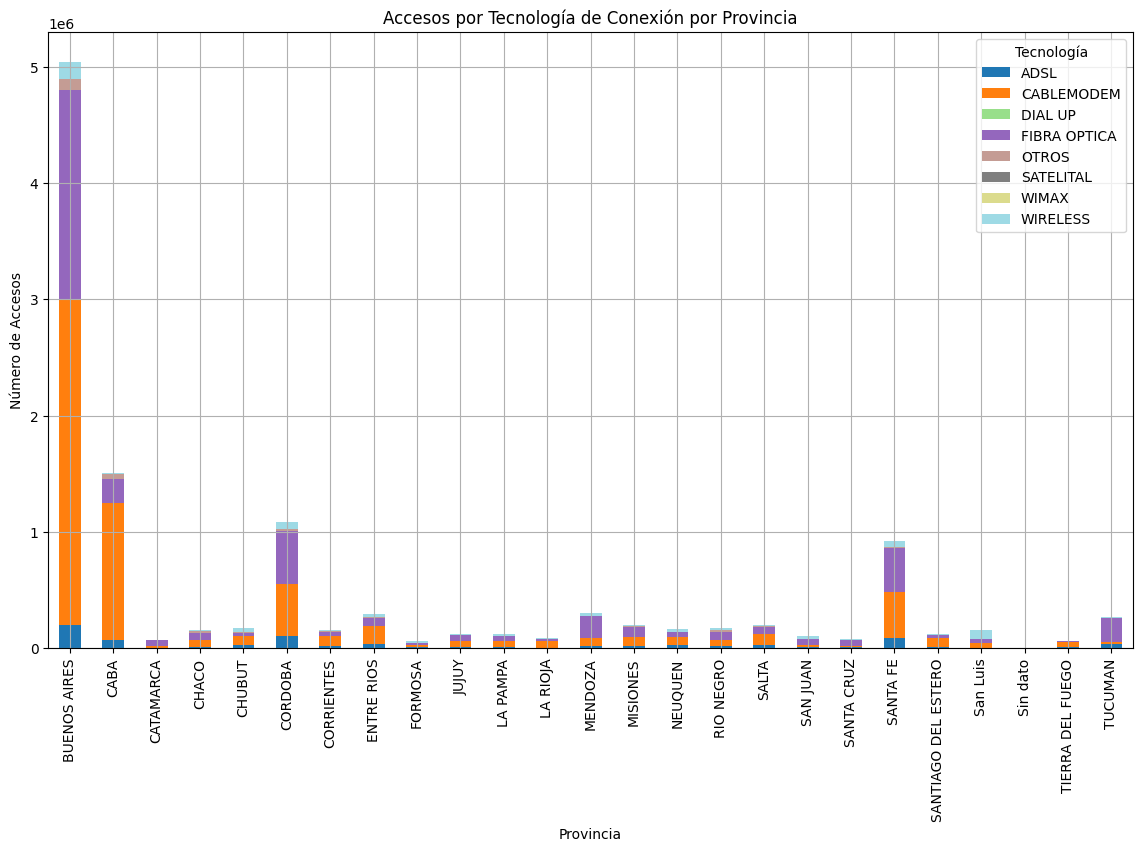

In [ ]:

df_tecnologia = pd.read_excel(archivo_excel, sheet_name='Accesos_tecnologia_localidad')

# Filtramos las columnas relevantes
df_tecnologia = df_tecnologia[['Provincia', 'ADSL', 'CABLEMODEM', 'DIAL UP', 'FIBRA OPTICA', 'OTROS', 'SATELITAL', 'WIMAX', 'WIRELESS']]

# Agrupamos por provincia y calcular la suma de accesos por tecnología
df_tecnologia_agrupado = df_tecnologia.groupby('Provincia').sum().reset_index()

# Encontramos la tecnología más prevalente por provincia
def tecnologia_prevalente(row):
    tecnologias = ['ADSL', 'CABLEMODEM', 'DIAL UP', 'FIBRA OPTICA', 'OTROS', 'SATELITAL', 'WIMAX', 'WIRELESS']
    # Encuentra la columna con el valor máximo
    max_tec = row[tecnologias].idxmax()
    return max_tec

df_tecnologia_agrupado['Tecnologia_Prevalente'] = df_tecnologia_agrupado.apply(tecnologia_prevalente, axis=1)

# Imprimimos la tecnología más prevalente en cada provincia
print("Tecnología más prevalente por provincia:")
print(df_tecnologia_agrupado[['Provincia', 'Tecnologia_Prevalente']])

# Creamos un gráfico para visualizar la prevalencia de tecnología por provincia
plt.figure(figsize=(14, 8))
df_tecnologia_agrupado.set_index('Provincia').plot(kind='bar', stacked=True, colormap='tab20', figsize=(14, 8))
plt.title('Accesos por Tecnología de Conexión por Provincia')
plt.xlabel('Provincia')
plt.ylabel('Número de Accesos')
plt.xticks(rotation=90)
plt.legend(title='Tecnología')
plt.grid(True)
plt.show()


Analizar la calidad de la conexión a internet y la velocidad media descargada en diferentes provincias. 

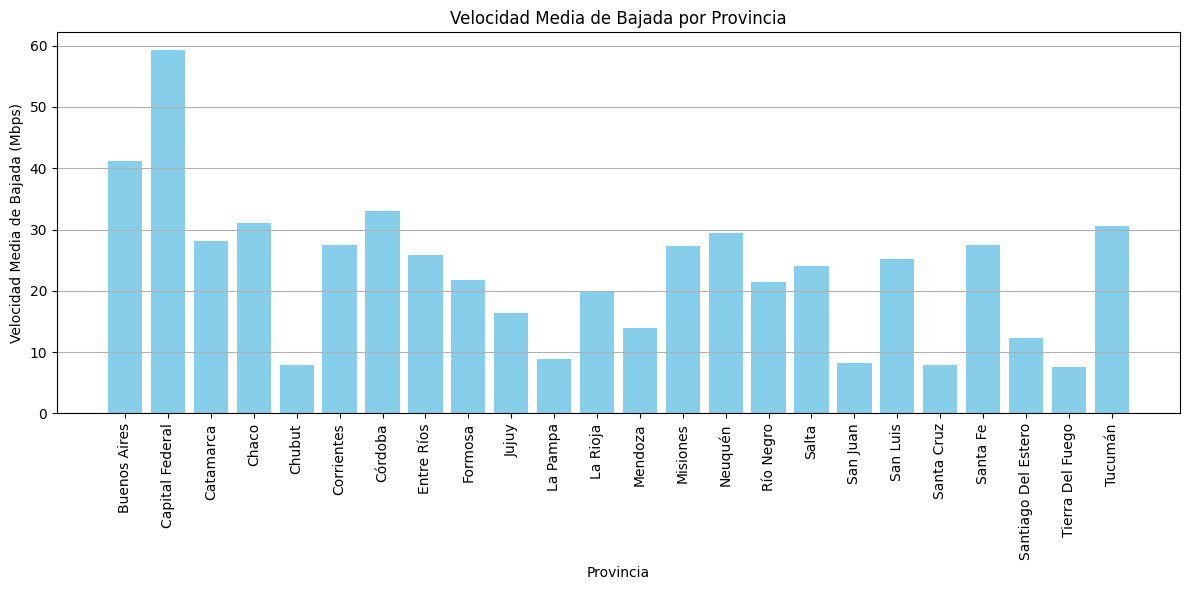

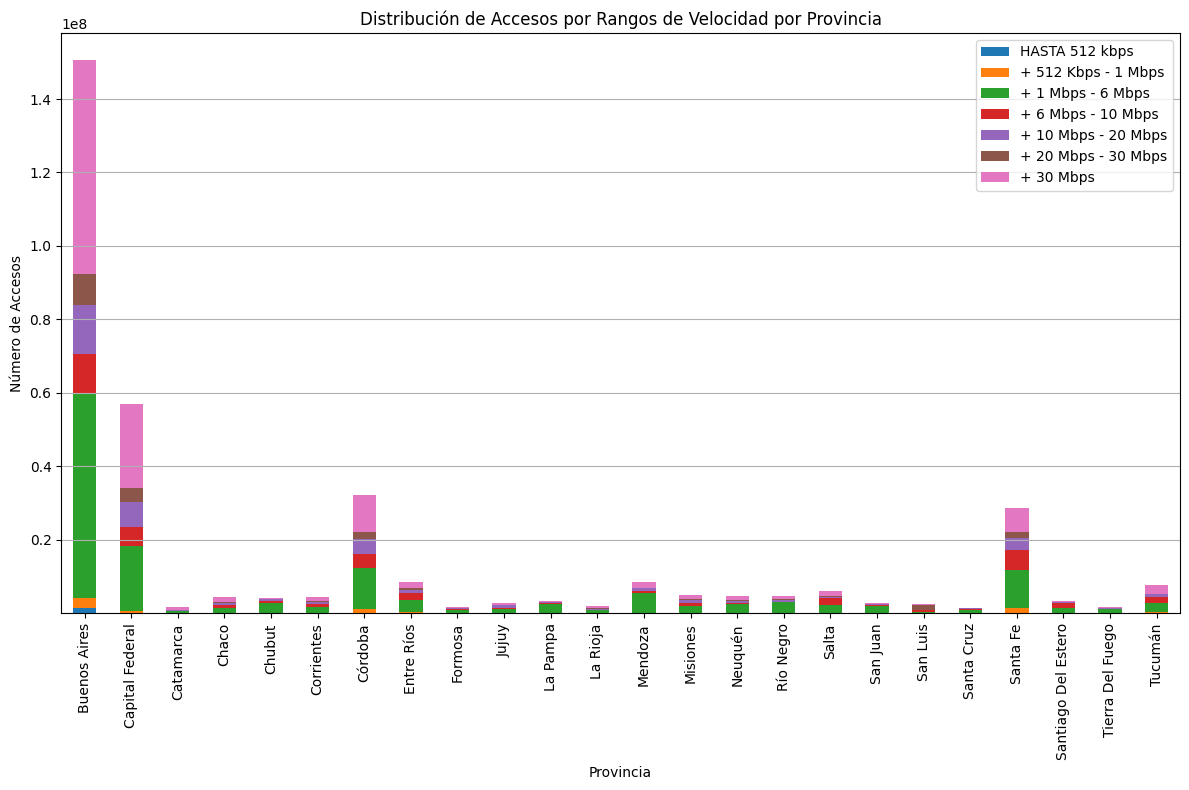

In [ ]:

# Cargamos pestañas relevantes
df_velocidad_por_prov = pd.read_excel(archivo_excel, sheet_name='Velocidad % por prov')
df_accesos_por_velocidad = pd.read_excel(archivo_excel, sheet_name='Accesos por velocidad')

# Filtramos columnas necesarias
df_velocidad_por_prov = df_velocidad_por_prov[['Provincia', 'Mbps (Media de bajada)']]

# Agrupamos datos por provincia para obtener la velocidad media de bajada
df_velocidad_media = df_velocidad_por_prov.groupby('Provincia').mean().reset_index()

# Filtramos columnas necesarias para accesos por velocidad
df_accesos_por_velocidad = df_accesos_por_velocidad[['Provincia', 'HASTA 512 kbps', '+ 512 Kbps - 1 Mbps', '+ 1 Mbps - 6 Mbps', '+ 6 Mbps - 10 Mbps', '+ 10 Mbps - 20 Mbps', '+ 20 Mbps - 30 Mbps', '+ 30 Mbps']]

# Agrupamos datos por provincia para obtener la distribución de accesos
df_accesos_distribucion = df_accesos_por_velocidad.groupby('Provincia').sum().reset_index()

# Visualizamos la velocidad media de bajada por provincia
plt.figure(figsize=(12, 6))
plt.bar(df_velocidad_media['Provincia'], df_velocidad_media['Mbps (Media de bajada)'], color='skyblue')
plt.xlabel('Provincia')
plt.ylabel('Velocidad Media de Bajada (Mbps)')
plt.title('Velocidad Media de Bajada por Provincia')
plt.xticks(rotation=90)
plt.grid(axis='y')
plt.tight_layout()
plt.show()

# Visualizamos la distribución de accesos por rangos de velocidad
df_accesos_distribucion.set_index('Provincia').plot(kind='bar', stacked=True, figsize=(12, 8))
plt.xlabel('Provincia')
plt.ylabel('Número de Accesos')
plt.title('Distribución de Accesos por Rangos de Velocidad por Provincia')
plt.xticks(rotation=90)
plt.grid(axis='y')
plt.tight_layout()
plt.show()


Vamos a evaluar los ingresos generados por los servicios de internet. Esto proporcionará una visión clara de la rentabilidad del servicio en diferentes regiones y permitirá identificar áreas con mayor potencial de crecimiento económico.

Vamos a explorar las hojas del dataset que vamos a utilizar "Ingresos' "Totales Accesos Por Tecnología"

In [ ]:
df_ingresos = pd.read_excel('Internet1.xlsx', sheet_name='Ingresos')
print("Valores faltantes en la hoja 'Ingresos':")
print(df_ingresos.isnull().sum())

Valores faltantes en la hoja 'Ingresos':
Año                          0
Trimestre                    0
Ingresos (miles de pesos)    0
Periodo                      0
dtype: int64


In [ ]:
df_accesos = pd.read_excel('Internet1.xlsx', sheet_name='Totales Accesos Por Tecnología')
print("\nValores faltantes en la hoja 'Totales Accesos Por Tecnología':")
print(df_accesos.isnull().sum())


Valores faltantes en la hoja 'Totales Accesos Por Tecnología':
Año             0
Trimestre       0
ADSL            0
Cablemodem      0
Fibra óptica    0
Wireless        0
Otros           0
Total           0
Periodo         0
dtype: int64


In [ ]:
df_ingresos = pd.read_excel('Internet1.xlsx', sheet_name='Ingresos')
print("Registros duplicados en la hoja 'Ingresos':")
print(df_ingresos)

Registros duplicados en la hoja 'Ingresos':
     Año  Trimestre  Ingresos (miles de pesos)        Periodo
0   2024          1               2.804191e+08   Ene-Mar 2024
1   2023          4               1.673760e+08   Oct-Dic 2023
2   2023          3               1.331066e+08  Jul-Sept 2023
3   2023          2               1.180603e+08   Jun-Mar 2023
4   2033          1               1.041350e+08   Ene-Mar 2023
5   2022          4               7.244348e+07   Oct-Dic 2022
6   2022          3               6.408678e+07  Jul-Sept 2022
7   2022          2               6.041950e+07   Abr-Jun 2022
8   2022          1               5.521931e+07   Ene-Mar 2022
9   2021          4               4.546789e+07   Oct-Dic 2021
10  2021          3               4.299994e+07  Jul-Sept 2021
11  2021          2               3.823967e+07   Abr-Jun 2021
12  2021          1               3.667637e+07   Ene-Mar 2021
13  2020          4               3.353970e+07   Oct-Dic 2020
14  2020          3       

Verificamos que hay un dato que esta mal cargado 2033 que corresponde 2023 tomando en cuenta el periodo Ene-Mar 2023. Vamos a solucionarlo.

In [ ]:
# Reemplazamos el año 2033 por 2023
df_ingresos['Año'] = df_ingresos['Año'].replace(2033, 2023)

# Verificamos si el reemplazo se ha realizado correctamente
print(df_ingresos[df_ingresos['Año'] == 2023])


with pd.ExcelWriter('Internet1.xlsx', mode='a', engine='openpyxl', if_sheet_exists='replace') as writer:
    df_ingresos.to_excel(writer, sheet_name='Ingresos', index=False)

    Año  Trimestre  Ingresos (miles de pesos)        Periodo
1  2023          4               1.673760e+08   Oct-Dic 2023
2  2023          3               1.331066e+08  Jul-Sept 2023
3  2023          2               1.180603e+08   Jun-Mar 2023
4  2023          1               1.041350e+08   Ene-Mar 2023


In [ ]:

df_ingresos = pd.read_excel('Internet1.xlsx', sheet_name='Ingresos')

# Convertimos la columna 'Ingresos (miles de pesos)' a tipo numérico
df_ingresos['Ingresos (miles de pesos)'] = df_ingresos['Ingresos (miles de pesos)'].replace({',': '.'}, regex=True).astype(float)

# Buscamos el trimestre con los ingresos más altos
trimestre_max_ingreso = df_ingresos.loc[df_ingresos['Ingresos (miles de pesos)'].idxmax()]
max_ingreso = trimestre_max_ingreso['Ingresos (miles de pesos)']
periodo_max_ingreso = trimestre_max_ingreso['Periodo']

# Buscamos el trimestre con los ingresos más bajos
trimestre_min_ingreso = df_ingresos.loc[df_ingresos['Ingresos (miles de pesos)'].idxmin()]
min_ingreso = trimestre_min_ingreso['Ingresos (miles de pesos)']
periodo_min_ingreso = trimestre_min_ingreso['Periodo']

# Imprimimos los resultados
print(f"El trimestre con los ingresos más altos fue {periodo_max_ingreso} con un ingreso de {max_ingreso:.2f} miles de pesos.")
print(f"El trimestre con los ingresos más bajos fue {periodo_min_ingreso} con un ingreso de {min_ingreso:.2f} miles de pesos.")


El trimestre con los ingresos más altos fue Ene-Mar 2024 con un ingreso de 280419124.08 miles de pesos.
El trimestre con los ingresos más bajos fue Ene-Mar 2014 con un ingreso de 2984054.21 miles de pesos.


In [ ]:
df_ingresos = pd.read_excel('Internet1.xlsx', sheet_name='Ingresos')
df_accesos = pd.read_excel('Internet1.xlsx', sheet_name='Totales Accesos Por Tecnología')

# Verificamos que las columnas comunes existen ('Año' y 'Trimestre')
if 'Año' in df_ingresos.columns and 'Año' in df_accesos.columns and 'Trimestre' in df_ingresos.columns and 'Trimestre' in df_accesos.columns:
    # Agrupar ingresos por 'Año' y 'Trimestre'
    ingresos_por_periodo = df_ingresos.groupby(['Año', 'Trimestre'])['Ingresos (miles de pesos)'].sum().reset_index()

    # Agrupamos accesos por 'Año' y 'Trimestre'
    accesos_por_periodo = df_accesos.groupby(['Año', 'Trimestre']).sum().reset_index()

    # Combinamos los DataFrames por 'Año' y 'Trimestre'
    df_combined = pd.merge(ingresos_por_periodo, accesos_por_periodo, on=['Año', 'Trimestre'])


In [ ]:
df_combined

,Año,Trimestre,Ingresos (miles de pesos),ADSL,Cablemodem,Fibra óptica,Wireless,Otros,Total,Periodo
0,2014,1,2.984054e+06,3697066,2407330,150323,70749,72930,6398398,Ene-Mar 2014
1,2014,2,3.270816e+06,3708882,2461670,149363,72405,72148,6464468,Abr-Jun 2014
2,2014,3,3.478638e+06,3714764,2569868,155494,85096,70049,6595271,Jul-Sept 2014
3,2014,4,3.950441e+06,3764038,2536219,149682,76984,71573,6598496,Oct-Dic 2014
4,2015,1,4.876385e+06,3756153,2668248,168188,79098,66045,6737732,Ene-Mar 2015
5,2015,2,4.701791e+06,3767821,2756294,150839,82077,59157,6816188,Abr-Jun 2015
6,2015,3,5.153739e+06,3788696,2840203,162663,84530,58976,6935068,Jul-Sept 2015
7,2015,4,5.376899e+06,3803024,2898226,139187,85726,58668,6984831,Oct-Dic 2015
8,2016,1,5.936845e+06,3792493,2806359,164371,85370,58763,6907356,Ene-Mar 2016
9,2016,2,6.534241e+06,3782085,3035272,167788,85452,59482,7130079,Abr-Jun 2016


Ingresos totales por Año:
     Año  Ingresos (miles de pesos)
0   2014               1.368395e+07
1   2015               2.010881e+07
2   2016               2.686751e+07
3   2017               3.967197e+07
4   2018               5.953959e+07
5   2019               8.677253e+07
6   2020               1.275858e+08
7   2021               1.633839e+08
8   2022               2.521691e+08
9   2023               5.226779e+08
10  2024               2.804191e+08
Análisis de ingresos guardado en el archivo 'Internet1_analisis_ingresos.xlsx'.


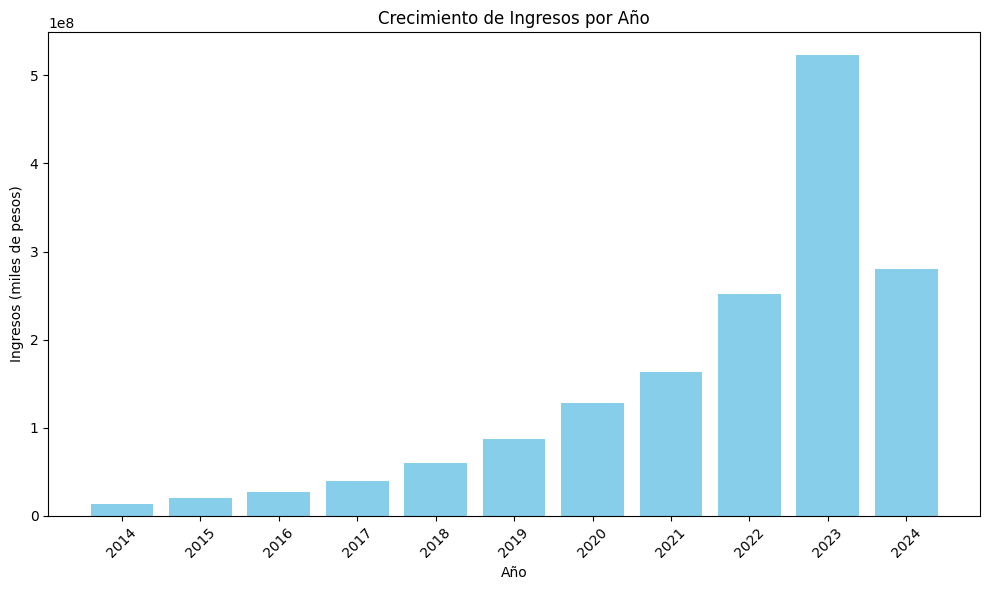

In [ ]:
import matplotlib.pyplot as plt

# Cargamos los datos desde las hojas 'Ingresos' y 'Totales_Accesos_Por_Tecnologia' del archivo Excel
df_ingresos = pd.read_excel('Internet1.xlsx', sheet_name='Ingresos')
df_accesos = pd.read_excel('Internet1.xlsx', sheet_name='Totales Accesos Por Tecnología')

# Verificamos que las columnas comunes existen ('Año' y 'Trimestre')
if 'Año' in df_ingresos.columns and 'Año' in df_accesos.columns and 'Trimestre' in df_ingresos.columns and 'Trimestre' in df_accesos.columns:
    # Agrupar ingresos por 'Año'
    ingresos_por_año = df_ingresos.groupby('Año')['Ingresos (miles de pesos)'].sum().reset_index()

    # Mostramos el DataFrame combinado para análisis
    print("Ingresos totales por Año:")
    print(ingresos_por_año)

    # Guardamos el análisis combinado en un nuevo archivo Excel
    ingresos_por_año.to_excel('Internet1_analisis_ingresos.xlsx', sheet_name='Ingresos_Anuales', index=False)
    print("Análisis de ingresos guardado en el archivo 'Internet1_analisis_ingresos.xlsx'.")

    # Graficamos los resultados
    plt.figure(figsize=(10, 6))
    plt.bar(ingresos_por_año['Año'].astype(str), ingresos_por_año['Ingresos (miles de pesos)'], color='skyblue')
    plt.title('Crecimiento de Ingresos por Año')
    plt.xlabel('Año')
    plt.ylabel('Ingresos (miles de pesos)')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

else:
    print("No se encuentran columnas comunes para combinar los datos. Verifique que ambas hojas tengan las columnas 'Año' y 'Trimestre'.")


Lo importante de ver en esta grafica es el crecimiento del año 2022 al 2023, dado que el 2024 no esta completo, lo agregue para saber como viene el año.

Ahora vamos a identificar por provincia con baja penetración de internet pero con un crecimiento en ingresos o con potencial de expansión de infraestructura, lo que sugiere oportunidades para capturar nuevos clientes o mejorar la oferta de servicios existentes.

In [ ]:
# Cargamos los datos
df_accesos = pd.read_excel('Internet1.xlsx', sheet_name='Accesos_tecnologia_localidad')
df_penetracion_hogares = pd.read_excel('Internet1.xlsx', sheet_name='Penetracion-hogares')
df_ingresos = pd.read_excel('Internet1.xlsx', sheet_name='Ingresos')

# Verificamos los nombres de columnas
print("Columnas en 'Accesos_tecnologia_localidad':")
print(df_accesos.columns)
print("\nColumnas en 'Penetracion-hogares':")
print(df_penetracion_hogares.columns)
print("\nColumnas en 'Ingresos':")
print(df_ingresos.columns)


Columnas en 'Accesos_tecnologia_localidad':
Index(['Provincia', 'Partido', 'Localidad', 'Link Indec', 'ADSL', 'CABLEMODEM',
       'DIAL UP', 'FIBRA OPTICA', 'OTROS', 'SATELITAL', 'WIMAX', 'WIRELESS',
       'Total general'],
      dtype='object')

Columnas en 'Penetracion-hogares':
Index(['Año', 'Trimestre', 'Provincia', 'Accesos por cada 100 hogares'], dtype='object')

Columnas en 'Ingresos':
Index(['Año', 'Trimestre', 'Ingresos (miles de pesos)', 'Periodo'], dtype='object')


Provincias con baja penetración y crecimiento en ingresos (2022 y 2023):
      Año_x  Trimestre            Provincia  Accesos por cada 100 hogares  \
534    2023          3                Chaco                     42.870000   
584    2023          3              Formosa                     38.860000   
714    2023          3  Santiago Del Estero                     48.670000   
774    2023          2                Chaco                     42.870000   
824    2023          2              Formosa                     38.320000   
934    2023          2           Santa Cruz                     41.660000   
954    2023          2  Santiago Del Estero                     47.140000   
1018   2023          1                Chaco                     43.150000   
1073   2023          1              Formosa                     38.790000   
1172   2023          1             San Juan                     49.750000   
1194   2023          1           Santa Cruz                     43.420000   
121

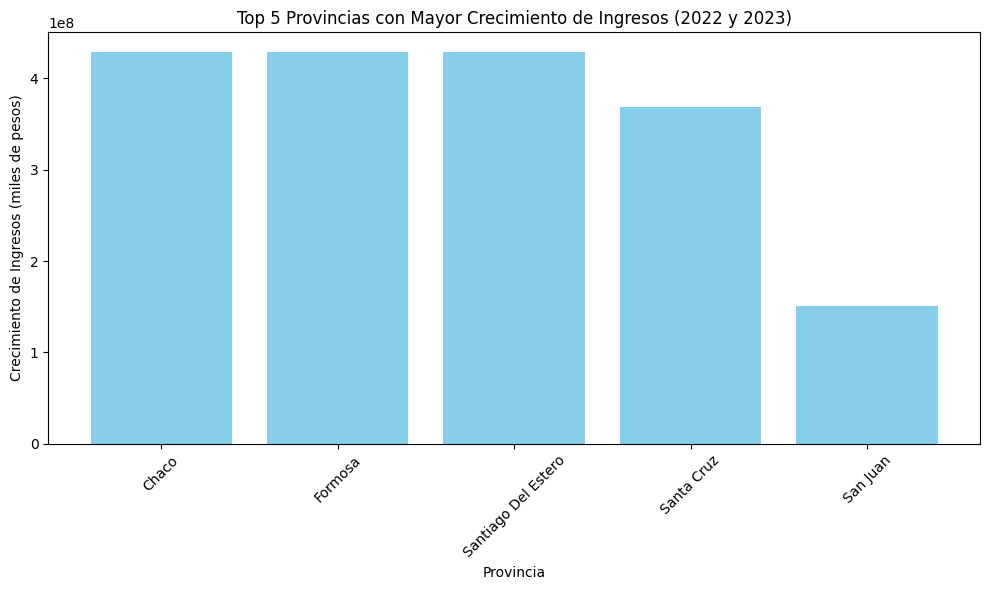

In [ ]:
import pandas as pd

# Cargamos los datos a usar
df_penetracion_hogares = pd.read_excel('Internet1.xlsx', sheet_name='Penetracion-hogares')
df_ingresos = pd.read_excel('Internet1.xlsx', sheet_name='Ingresos')

# Fusionamos los datos basándose solo en la columna 'Trimestre'
df_combined = pd.merge(df_penetracion_hogares, df_ingresos, on='Trimestre', how='left')

# Filtramos los datos solo para los años 2022 y 2023 después de la fusión
df_filtered = df_combined[df_combined['Año_x'].isin([2022, 2023]) & df_combined['Año_y'].isin([2022, 2023])]

# Filtramos regiones con baja penetración de internet 
umbral_penetracion = 50  
baja_penetracion = df_filtered[df_filtered['Accesos por cada 100 hogares'] < umbral_penetracion]

# Filtramos regiones con crecimiento en ingresos
baja_penetracion = baja_penetracion.copy()  # Crear una copia para evitar el SettingWithCopyWarning
baja_penetracion['Ingresos Anteriores'] = baja_penetracion.groupby('Provincia')['Ingresos (miles de pesos)'].shift(1)
baja_penetracion['Crecimiento Ingresos'] = baja_penetracion['Ingresos (miles de pesos)'] - baja_penetracion['Ingresos Anteriores']

# Filtramos oportunidades con crecimiento positivo en ingresos
oportunidades = baja_penetracion[baja_penetracion['Crecimiento Ingresos'] > 0]

# Mostramos los resultados
print("Provincias con baja penetración y crecimiento en ingresos (2022 y 2023):")
print(oportunidades)

# Seleccionamos las provincias con mayor crecimiento
top_provincias = oportunidades.groupby('Provincia').agg({
    'Crecimiento Ingresos': 'sum'
}).reset_index()

top_provincias = top_provincias.sort_values(by='Crecimiento Ingresos', ascending=False).head(5)

# Graficamos
plt.figure(figsize=(10, 6))
plt.bar(top_provincias['Provincia'], top_provincias['Crecimiento Ingresos'], color='skyblue')
plt.xlabel('Provincia')
plt.ylabel('Crecimiento de Ingresos (miles de pesos)')
plt.title('Top 5 Provincias con Mayor Crecimiento de Ingresos (2022 y 2023)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Vamos a combinar datos para identificar áreas donde se pueden implementar mejoras en la infraestructura tecnológica. El objetivo es focalizar en regiones con baja velocidad de conexión o alta demanda de servicios, con el fin de optimizar la calidad del servicio y satisfacer mejor las necesidades de los usuario

Vamos a Combinar los datos de: Totales VMD, Accesos por velocidad, Penetracion-hogares. Antes vamos a explorar la columna Totales VMD

In [ ]:
# Cargamos los datos de la pestaña 'Totales_VMD'
df_totales_vmd = pd.read_excel('Internet1.xlsx', sheet_name='Totales VMD')

# Verificamos si hay datos nulos
print("Datos nulos por columna:")
print(df_totales_vmd.isnull().sum())

# Verificamos si hay datos duplicados
print("\nNúmero de filas duplicadas:")
print(df_totales_vmd.duplicated().sum())

# Mostramos una vista general de los primeros registros para verificar el formato
print("\nPrimeros registros del DataFrame:")
print(df_totales_vmd.head())


Datos nulos por columna:
Año                       0
Trimestre                 0
Mbps (Media de bajada)    0
Trimestre.1               0
dtype: int64

Número de filas duplicadas:
0

Primeros registros del DataFrame:
    Año  Trimestre  Mbps (Media de bajada)    Trimestre.1
0  2024          1                  139.15   Ene-Mar 2024
1  2023          4                  139.04   Oct-Dic 2023
2  2023          3                  129.67  Jul-Sept 2023
3  2023          2                  123.95   Abr-Jun 2023
4  2023          1                  110.50   Ene-Mar 2023


In [ ]:
# Cargamos los datos de cada pestaña
df_totales_vmd = pd.read_excel('Internet1.xlsx', sheet_name='Totales VMD')
df_accesos_velocidad = pd.read_excel('Internet1.xlsx', sheet_name='Accesos por velocidad')
df_penetracion_hogares = pd.read_excel('Internet1.xlsx', sheet_name='Penetracion-hogares')

# Filtramos solo los datos de los años 2022 y 2023
df_totales_vmd = df_totales_vmd[df_totales_vmd['Año'].isin([2022, 2023])]
df_accesos_velocidad = df_accesos_velocidad[df_accesos_velocidad['Año'].isin([2022, 2023])]
df_penetracion_hogares = df_penetracion_hogares[df_penetracion_hogares['Año'].isin([2022, 2023])]

# Mostramos los primeros registros de los datos filtrados
print("Datos de Totales VMD (2022-2023):")
print(df_totales_vmd.head())

print("\nDatos de Accesos por Velocidad (2022-2023):")
print(df_accesos_velocidad.head())

print("\nDatos de Penetración Hogares (2022-2023):")
print(df_penetracion_hogares.head())


Datos de Totales VMD (2022-2023):
    Año  Trimestre  Mbps (Media de bajada)    Trimestre.1
1  2023          4                  139.04   Oct-Dic 2023
2  2023          3                  129.67  Jul-Sept 2023
3  2023          2                  123.95   Abr-Jun 2023
4  2023          1                  110.50   Ene-Mar 2023
5  2022          4                  106.56   Oct-Dic 2022

Datos de Accesos por Velocidad (2022-2023):
     Año  Trimestre        Provincia  HASTA 512 kbps  + 512 Kbps - 1 Mbps  \
48  2023          3     Buenos Aires         27440.0              24820.0   
49  2023          3  Capital Federal           516.0               4690.0   
50  2023          3        Catamarca            71.0                224.0   
51  2023          3            Chaco           236.0                462.0   
52  2023          3           Chubut           111.0               1470.0   

    + 1 Mbps - 6 Mbps  + 6 Mbps - 10 Mbps  + 10 Mbps - 20 Mbps  \
48           242010.0            241310.0   

In [ ]:
# Combinamos los datos de Totales VMD con Accesos por Velocidad solo por 'Trimestre'
df_combined_vmd_accesos = pd.merge(
    df_totales_vmd.drop(columns=['Año']),  
    df_accesos_velocidad,
    on=['Trimestre'], 
    how='left'
)

# Combinamos el resultado anterior con Penetracion Hogares
df_combined_all = pd.merge(
    df_combined_vmd_accesos, 
    df_penetracion_hogares, 
    on=['Trimestre', 'Provincia'], 
    how='left',
    suffixes=('_accesos', '_penetracion') 
)

C:\Users\Perettib\AppData\Local\Temp\ipykernel_3952\2089641614.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='Trimestre', y='Mbps (Media de bajada)', data=df_combined_all, ci=None, palette='viridis')
C:\Users\Perettib\AppData\Local\Temp\ipykernel_3952\2089641614.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Trimestre', y='Mbps (Media de bajada)', data=df_combined_all, ci=None, palette='viridis')


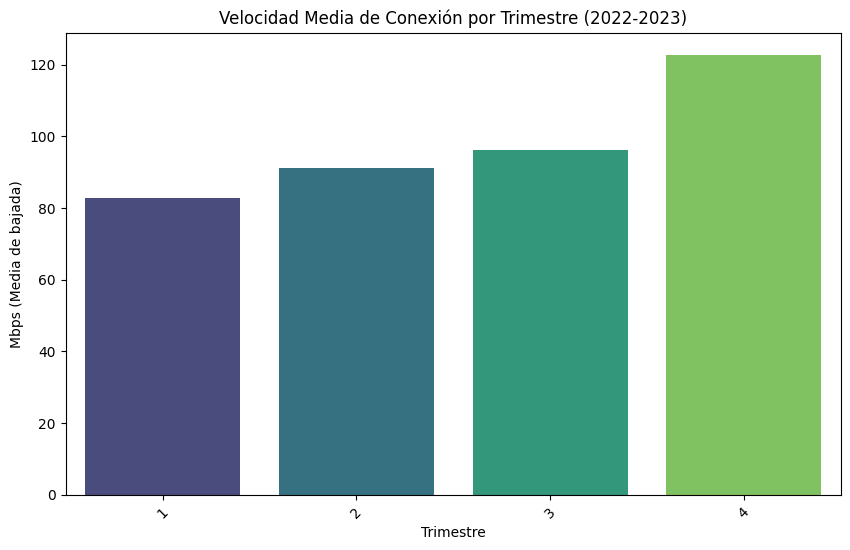

In [ ]:
# Creamos un gráfico de barras para mostrar la velocidad media de conexión por trimestre
plt.figure(figsize=(10, 6))
sns.barplot(x='Trimestre', y='Mbps (Media de bajada)', data=df_combined_all, ci=None, palette='viridis')
plt.title('Velocidad Media de Conexión por Trimestre (2022-2023)')
plt.ylabel('Mbps (Media de bajada)')
plt.xticks(rotation=45)
plt.show()

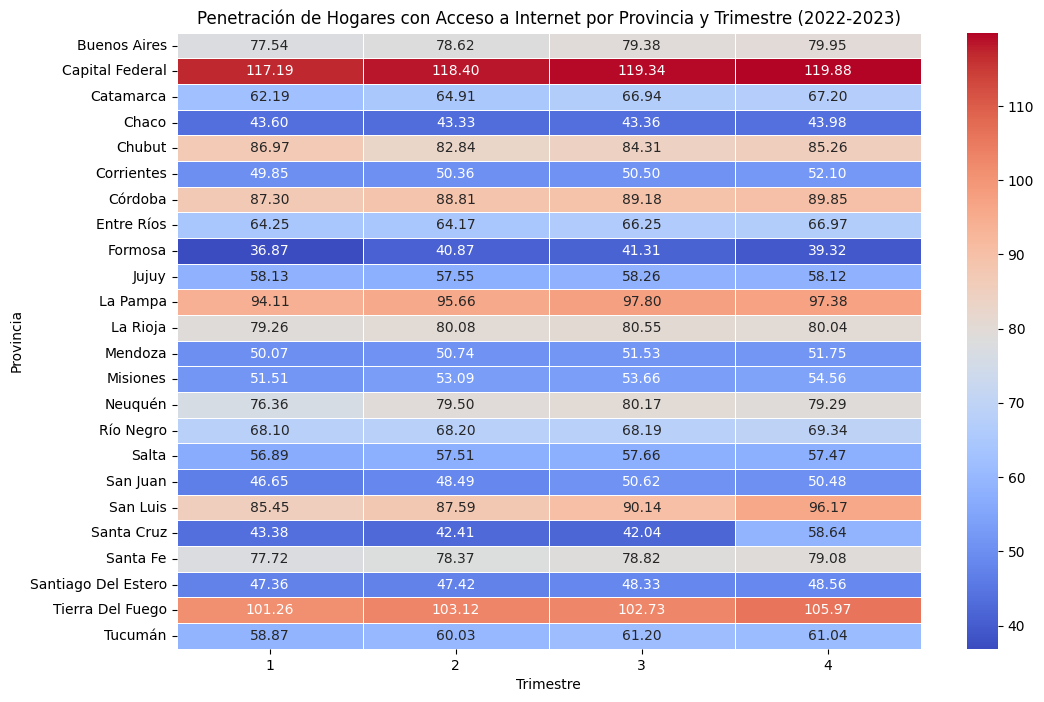

In [ ]:
# Creamos un mapa de calor para la penetración de hogares por provincia y trimestre
pivot_table = df_combined_all.pivot_table(index='Provincia', columns='Trimestre', values='Accesos por cada 100 hogares')

plt.figure(figsize=(12, 8))
sns.heatmap(pivot_table, annot=True, fmt=".2f", cmap='coolwarm', linewidths=0.5)
plt.title('Penetración de Hogares con Acceso a Internet por Provincia y Trimestre (2022-2023)')
plt.ylabel('Provincia')
plt.xlabel('Trimestre')
plt.show()

In [12]:
import pandas as pd

# Cargamos los datos desde el archivo original
df_acc_vel_loc_sinrangos = pd.read_excel('Internet1.xlsx', sheet_name='Acc_vel_loc_sinrangos')
df_tecnologia = pd.read_excel('Internet1.xlsx', sheet_name='Accesos_tecnologia_localidad')
df_velocidad_por_prov = pd.read_excel('Internet1.xlsx', sheet_name='Velocidad % por prov')
df_ingresos = pd.read_excel('Internet1.xlsx', sheet_name='Ingresos')
df_accesos = pd.read_excel('Internet1.xlsx', sheet_name='Totales Accesos Por Tecnología')
df_penetracion_hogares = pd.read_excel('Internet1.xlsx', sheet_name='Penetracion-hogares')
df_totales_vmd = pd.read_excel('Internet1.xlsx', sheet_name='Totales VMD')
df_accesos_velocidad = pd.read_excel('Internet1.xlsx', sheet_name='Accesos por velocidad')



# Guardamos todos los DataFrames actualizados en el archivo Excel
with pd.ExcelWriter('Internet1.xlsx', engine='openpyxl', mode='a', if_sheet_exists='replace') as writer:
    df_acc_vel_loc_sinrangos.to_excel(writer, sheet_name='Acc_vel_loc_sinrangos', index=False)
    df_tecnologia.to_excel(writer, sheet_name='Accesos_tecnologia_localidad', index=False)
    df_velocidad_por_prov.to_excel(writer, sheet_name='Velocidad % por prov', index=False)
    df_ingresos.to_excel(writer, sheet_name='Ingresos', index=False)
    df_accesos.to_excel(writer, sheet_name='Totales Accesos Por Tecnología', index=False)
    df_penetracion_hogares.to_excel(writer, sheet_name='Penetracion-hogares', index=False)
    df_totales_vmd.to_excel(writer, sheet_name='Totales VMD', index=False)
    df_accesos_velocidad.to_excel(writer, sheet_name='Accesos por velocidad', index=False)
